# Fuzzy EMS

In [1]:
%load_ext autoreload
%autoreload 2  

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from hessems import fuzzy

%matplotlib widget

## Test One - Std Definition

In [3]:
controller = fuzzy.build_controller()

### Show MFs

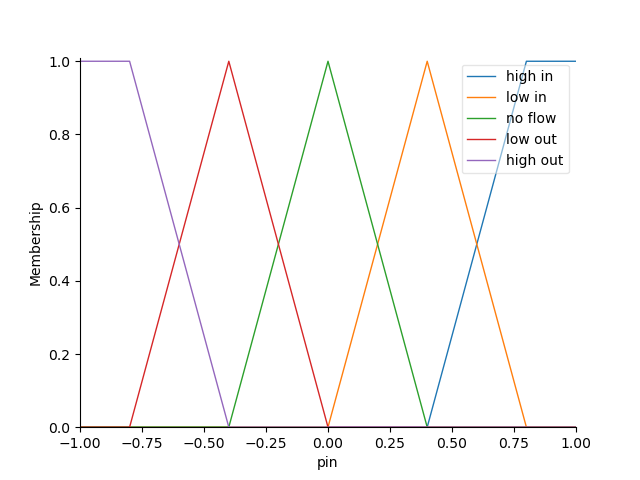

Antecedent: epeak

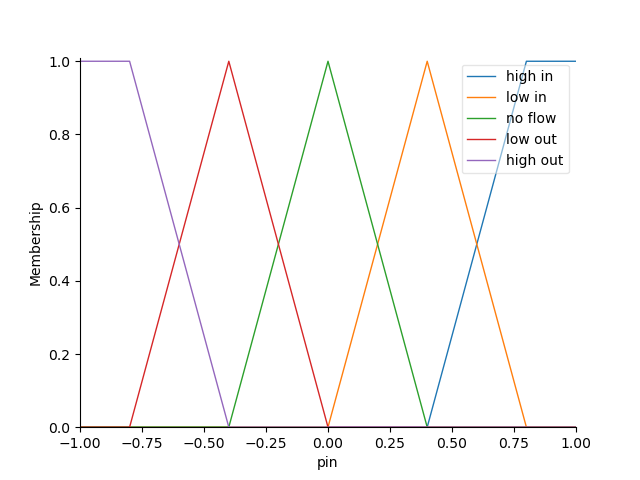

In [4]:
ante = list(controller.ctrl.antecedents)
ante[0].view()
ante[1]

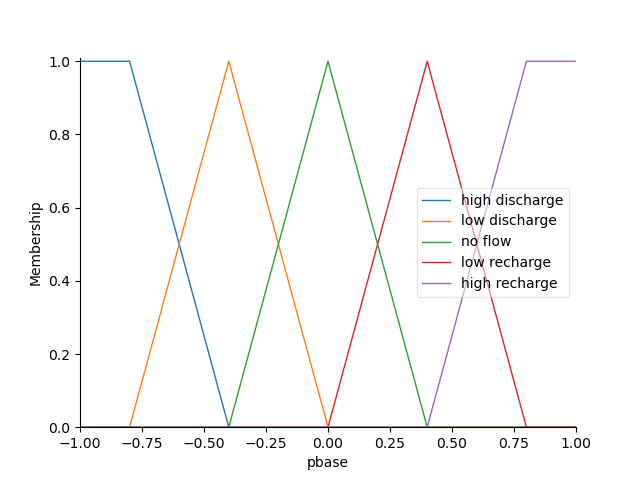

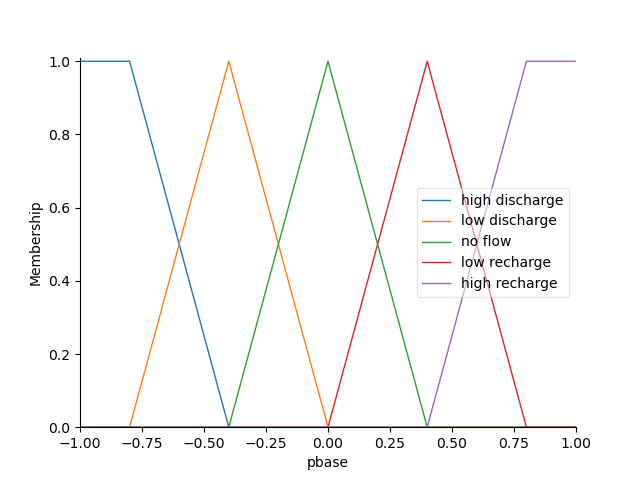

In [5]:
con = list(controller.ctrl.consequents)
con[0].view()

Result = 0.7833333333333334


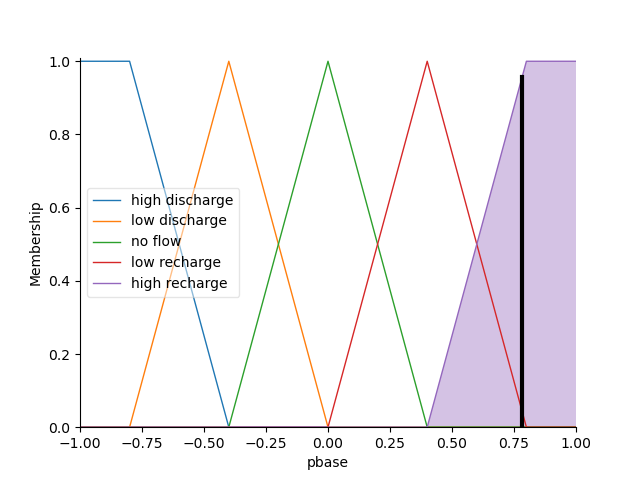

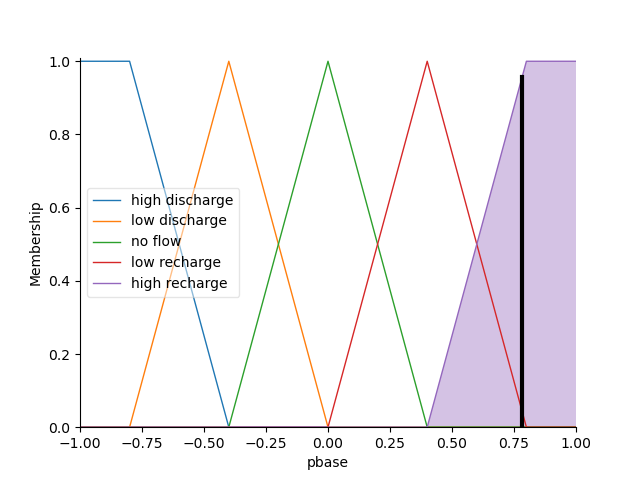

In [8]:
# Simulate one output and visualize it
controller.input['epeak'] = 0.5
controller.input['pin'] = 1
controller.compute()
print(f'Result = {controller.output["pbase"]}')
con[0].view(sim=controller)

Result = -0.13913043478260842


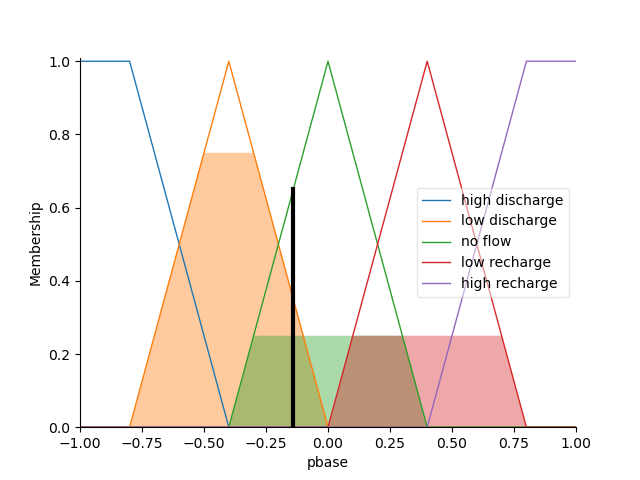

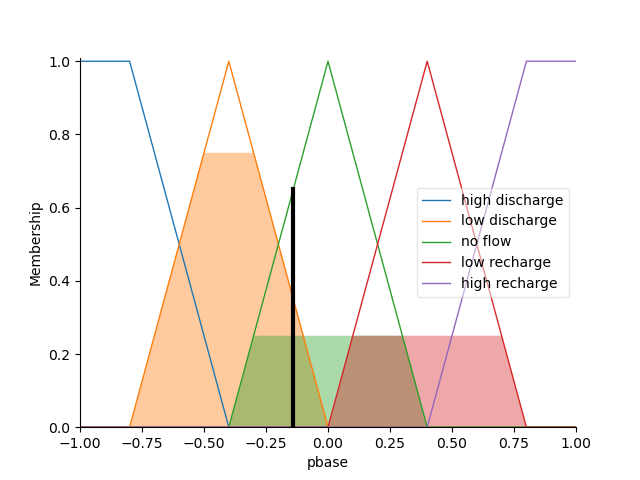

In [15]:
# Simulate one output and visualize it
controller.input['epeak'] = 0.75
controller.input['pin'] = -0.7
controller.compute()
print(f'Result = {controller.output["pbase"]}')
con[0].view(sim=controller)

### Create output surface

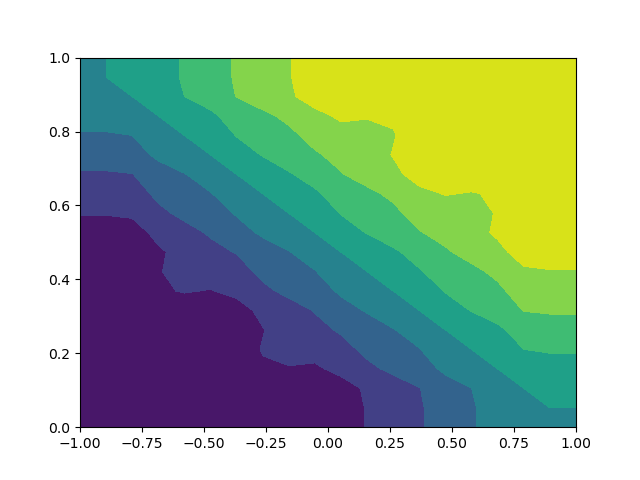

In [29]:
pin = np.linspace(-1, 1, 20)
epeak = np.linspace(0, 1, 20)
pgrid, egrid = np.meshgrid(pin, epeak)
vec_fuzzy = np.vectorize(lambda x, y: fuzzy.fuzzy(x, y, controller))
pbasegrid, ppeakgrid = vec_fuzzy(pgrid, egrid)

plt.figure()
plt.contourf(pgrid, egrid, pbasegrid)
plt.show()

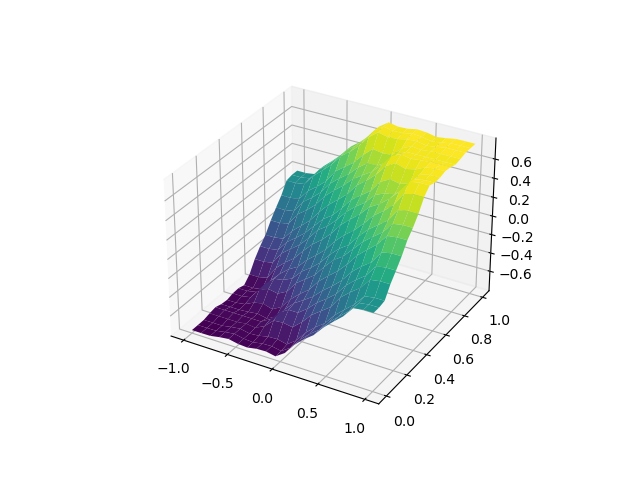

In [30]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(pgrid, egrid, pbasegrid, cmap='viridis')

### Test two - Custom MFs with enlarged center region

In [ ]:
custom_mf_in = {
    'pin': {
        'high in': [0.7, 0.9, 1, 1],
        'low in': [0.4, 0.8, 0.9],
        'no flow': [-0.7, 0, 0.7],
        'low out': [-0.9, -0.8, -0.4],
        'high out': [-1, -1, -0.9, -0.7],
    },
    'epeak': {
        'very low': [0, 0, 0.1, 0.3],
        'low': [0.1, 0.3, 0.5],
        'good': [0.3, 0.5, 0.7],
        'high': [0.5, 0.7, 0.9],
        'very high': [0.7, 0.9, 1, 1],
    }
}
